In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt 
import numpy as np
import tqdm

import itertools
from itertools import combinations, product

import random
import seaborn as sns
from scipy.spatial.distance import cdist
import gensim
from gensim.models import Word2Vec

from sklearn.manifold import TSNE
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

import prep_data_functions
import embeddings_functions

import warnings

In [2]:
warnings.filterwarnings('ignore')
gensim.models.keyedvectors.logger.setLevel(50)
warnings.filterwarnings("ignore", category=DeprecationWarning, module="gensim.models.keyedvectors")
sns.set(style="whitegrid")

# Experiment 1 

In [5]:
num_documents_values = [10, 50, 200, 500]
vector_sizes = [2, 100]

## Random generator inicialization

In [6]:
def pseudorandom_weak_vector(size, seed_string=None, hashfxn=hash):
    """Get a random vector, derived deterministically from `seed_string` if supplied.
    Useful for initializing KeyedVectors that will be the starting projection/input layers of _2Vec models.

    """
    if seed_string:
        once = np.random.Generator(np.random.SFC64(hashfxn(seed_string) & 0xffffffff))
    else:
        once = np.random.default_rng()
    vector = (once.random(size).astype(np.float32) - 0.5) / size
    normalized_vector = normalize([vector], norm='l2')
    return normalized_vector[0]

Experiment: num_doc =10, vector_size=2 
Experiment: num_doc =50, vector_size=2 
Experiment: num_doc =200, vector_size=2 
Experiment: num_doc =500, vector_size=2 
Experiment: num_doc =10, vector_size=100 
Experiment: num_doc =50, vector_size=100 
Experiment: num_doc =200, vector_size=100 
Experiment: num_doc =500, vector_size=100 


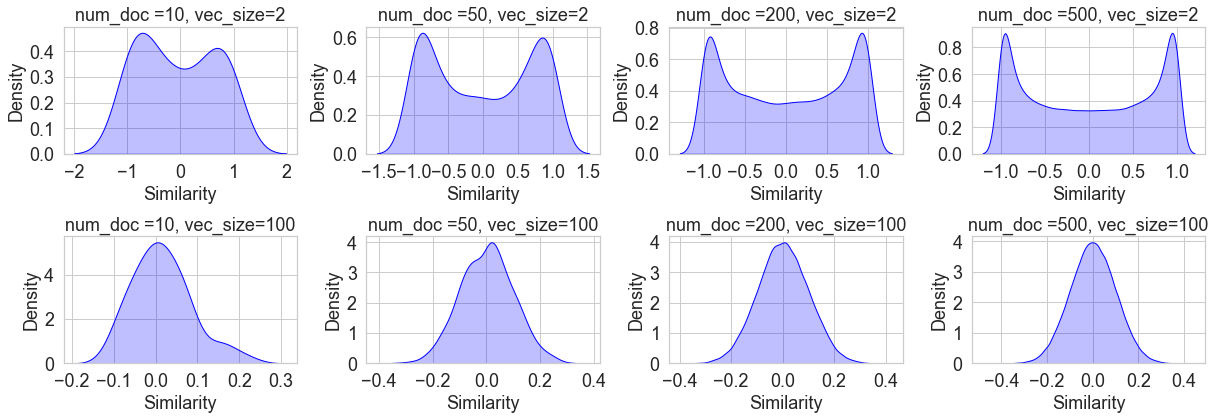

In [7]:
plt.figure(figsize=(17, 6))

for i, vector_size in enumerate(vector_sizes):
    
    for j, num_documents in enumerate(num_documents_values):
        
        document_length = 1
        corpus = [[str(k)] for k in range(num_documents)]
        words = np.array(corpus)[:, 0]
        
        word_embeddings = pd.DataFrame([pseudorandom_weak_vector(vector_size) for _ in range(len(words))])
        word_embeddings.index = words

        similarity = embeddings_functions.Similarity2(embeddings_df=word_embeddings)
        df_cosine = similarity.get_cosine_similarity_of_all_words()
        print(f"Experiment: num_doc ={num_documents}, vector_size={vector_size} ")
        
        subplot_idx = (i * len(num_documents_values)) + j + 1
        ax = plt.subplot(len(vector_sizes), len(num_documents_values), subplot_idx)
        sns.kdeplot(df_cosine["similarity"], color="blue", label="Cosine Similarity", fill=True)
        plt.xlabel("Similarity")
        plt.ylabel("Density")
        plt.title(f"num_doc ={num_documents}, vec_size={vector_size}")
        
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(18)  

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.savefig('random_density.pdf', bbox_inches='tight', pad_inches=0.1)

plt.tight_layout()
plt.show()

Experiment: num_documents=10, vector_size=2
Experiment: num_documents=50, vector_size=2
Experiment: num_documents=200, vector_size=2
Experiment: num_documents=500, vector_size=2
Experiment: num_documents=10, vector_size=100
Experiment: num_documents=50, vector_size=100
Experiment: num_documents=200, vector_size=100
Experiment: num_documents=500, vector_size=100


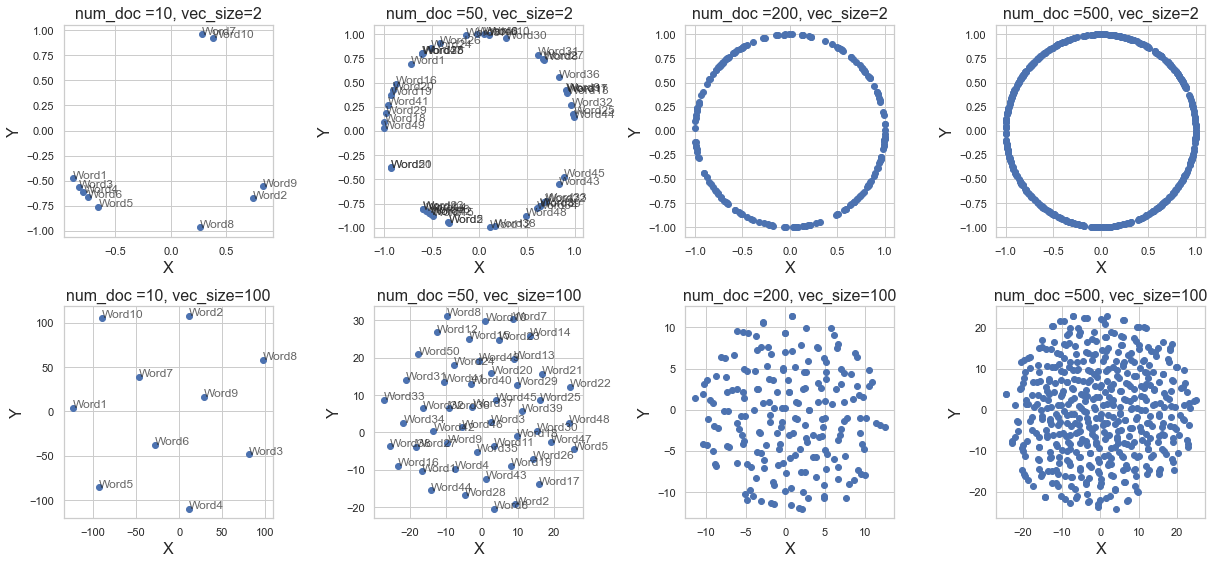

In [8]:
plt.figure(figsize=(17, 8))

for j, vector_size in enumerate(vector_sizes):
    
    for i, num_documents in enumerate(num_documents_values):
       
        document_length = 1
        experimental = prep_data_functions.ExperimentalDF(num_documents=num_documents, document_length=document_length)
        corpus = experimental.create_experiment_wo_dupl()
        words = np.array(corpus)[:, 0]

        word_embeddings = pd.DataFrame([pseudorandom_weak_vector(vector_size) for _ in range(len(words))])
        word_embeddings.index = words

        print(f"Experiment: num_documents={num_documents}, vector_size={vector_size}")
        ax = plt.subplot(len(vector_sizes), len(num_documents_values), j * len(num_documents_values) + i + 1)  # Note the swap in dimensions
        embedding_array = word_embeddings.values
        num_dimensions = embedding_array.shape[1]

        if num_dimensions == 2:
            x = embedding_array[:, 0]
            y = embedding_array[:, 1]
            plt.scatter(x, y)
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Y", fontsize=16)
            plt.title(f"num_doc ={num_documents}, vec_size={vector_size}", fontsize=16)
            
            if num_documents <= 50:
                for k, word in enumerate(word_embeddings.index):
                    plt.annotate(word, (x[k], y[k]), alpha=0.7, fontsize=12)  # Adjust fontsize as needed
        else:
            tsne_model = TSNE(n_components=2, random_state=42)
            tsne_embeddings = tsne_model.fit_transform(embedding_array)
            x = tsne_embeddings[:, 0]
            y = tsne_embeddings[:, 1]
            plt.scatter(x, y)
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Y", fontsize=16)
            plt.title(f"num_doc ={num_documents}, vec_size={vector_size}", fontsize=16)
            
            if num_documents <= 50:
                for k, word in enumerate(word_embeddings.index):
                    plt.annotate(word, (x[k], y[k]), alpha=0.7, fontsize=12)  # Adjust fontsize as needed


plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.savefig('random_plot.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()

## Word2vec

Experiment: num_doc =10, vector_size=2 - train is done
Experiment: num_doc =50, vector_size=2 - train is done
Experiment: num_doc =200, vector_size=2 - train is done
Experiment: num_doc =500, vector_size=2 - train is done
Experiment: num_doc =10, vector_size=100 - train is done
Experiment: num_doc =50, vector_size=100 - train is done
Experiment: num_doc =200, vector_size=100 - train is done
Experiment: num_doc =500, vector_size=100 - train is done


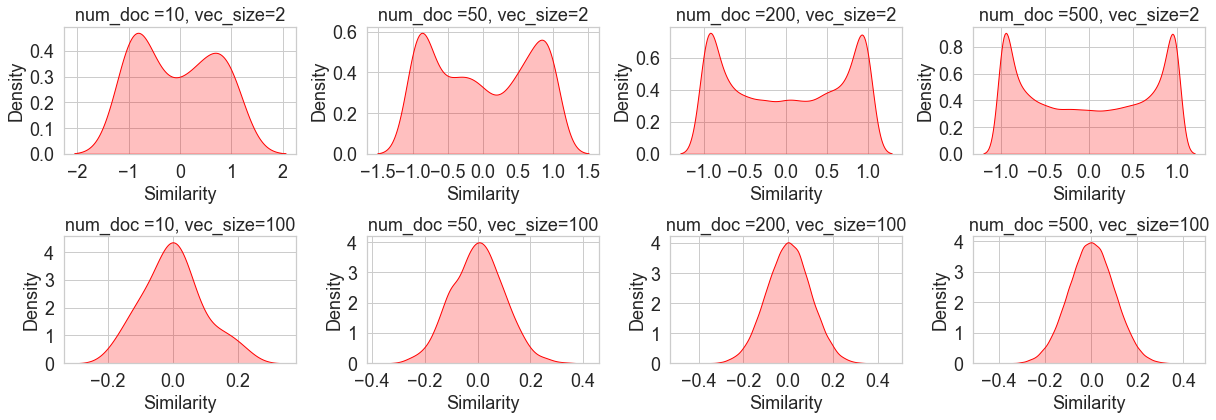

In [9]:
plt.figure(figsize=(17, 6))

# Plot similarity graphs
for i, vector_size in enumerate(vector_sizes):
    for j, num_documents in enumerate(num_documents_values):
        
        document_length = 1
        experimental = prep_data_functions.ExperimentalDF(num_documents=num_documents, document_length=document_length)
        corpus = experimental.create_experiment_wo_dupl()
        words = np.array(corpus)[:, 0]

        word_embeddings = embeddings_functions.Word2VecEmbeddings(corpus)
        embeddings = word_embeddings.train_and_get_emb(words=words,
                                                        window=1,
                                                        min_count=1,
                                                        workers=1,
                                                        seed=1,
                                                        sg=1,
                                                        vector_size=vector_size,
                                                        norm=True)

        similarity = embeddings_functions.Similarity2(embeddings_df=embeddings)
        df_cosine = similarity.get_cosine_similarity_of_all_words()
        print(f"Experiment: num_doc ={num_documents}, vector_size={vector_size} - train is done")
        
        subplot_idx = (i * len(num_documents_values)) + j + 1
        ax = plt.subplot(len(vector_sizes), len(num_documents_values), subplot_idx)
        sns.kdeplot(df_cosine["similarity"], color="red", label="Cosine Similarity", fill=True)
        plt.xlabel("Similarity")
        plt.ylabel("Density")
        plt.title(f"num_doc ={num_documents}, vec_size={vector_size}")
        
        # Increase font size for all text in the plot
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(18)  # You can adjust the font size as needed

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.savefig('w2v_density.pdf',bbox_inches='tight', pad_inches=0.1)

plt.tight_layout()
plt.show()

Experiment: num_documents=10, vector_size=2 - train is done
Experiment: num_documents=50, vector_size=2 - train is done
Experiment: num_documents=200, vector_size=2 - train is done
Experiment: num_documents=500, vector_size=2 - train is done
Experiment: num_documents=10, vector_size=100 - train is done
Experiment: num_documents=50, vector_size=100 - train is done
Experiment: num_documents=200, vector_size=100 - train is done
Experiment: num_documents=500, vector_size=100 - train is done


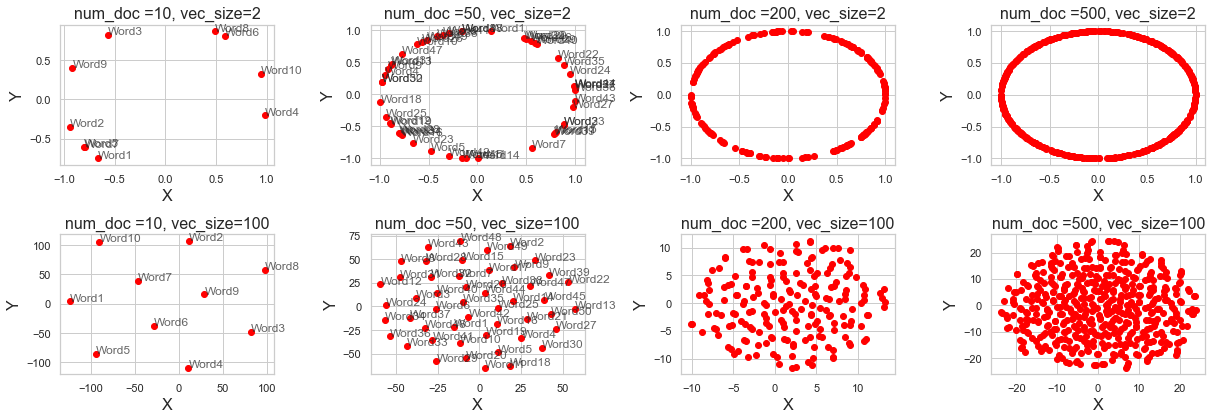

In [10]:
plt.figure(figsize=(17, 6))

for j, vector_size in enumerate(vector_sizes):
    
    for i, num_documents in enumerate(num_documents_values):
       
        document_length = 1
        experimental = prep_data_functions.ExperimentalDF(num_documents=num_documents, document_length=document_length)
        corpus = experimental.create_experiment_wo_dupl()
        words = np.array(corpus)[:, 0]

        word_embeddings = embeddings_functions.Word2VecEmbeddings(corpus)
        embeddings = word_embeddings.train_and_get_emb(words=words,
                                                        window=1,
                                                        min_count=1,
                                                        workers=1,
                                                        seed=1,
                                                        sg=1,
                                                        vector_size=vector_size,
                                                        norm=True)

        print(f"Experiment: num_documents={num_documents}, vector_size={vector_size} - train is done")
        ax = plt.subplot(len(vector_sizes), len(num_documents_values), j * len(num_documents_values) + i + 1)  # Note the swap in dimensions
        embedding_array = embeddings.values
        num_dimensions = embedding_array.shape[1]

        if num_dimensions == 2:
            x = embedding_array[:, 0]
            y = embedding_array[:, 1]
            plt.scatter(x, y, color = "red")
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Y", fontsize=16)
            plt.title(f"num_doc ={num_documents}, vec_size={vector_size}", fontsize=16)
            
            if num_documents <=50:
                for k, word in enumerate(embeddings.index):
                    plt.annotate(word, (x[k], y[k]), alpha=0.7, fontsize=12)  # Adjust fontsize as needed
        else:
            tsne_model = TSNE(n_components=2, random_state=42)
            tsne_embeddings = tsne_model.fit_transform(embedding_array)
            x = tsne_embeddings[:, 0]
            y = tsne_embeddings[:, 1]
            plt.scatter(x, y, color = "red")
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Y", fontsize=16)
            plt.title(f"num_doc ={num_documents}, vec_size={vector_size}", fontsize=16)
            
            if num_documents <=50:
                for k, word in enumerate(embeddings.index):
                    plt.annotate(word, (x[k], y[k]), alpha=0.7, fontsize=12)  # Adjust fontsize as needed

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.savefig('w2v_plot.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()


## Fast text

Experiment: num_doc =10, vector_size=2 - train is done
Experiment: num_doc =50, vector_size=2 - train is done
Experiment: num_doc =200, vector_size=2 - train is done
Experiment: num_doc =500, vector_size=2 - train is done
Experiment: num_doc =10, vector_size=100 - train is done
Experiment: num_doc =50, vector_size=100 - train is done
Experiment: num_doc =200, vector_size=100 - train is done
Experiment: num_doc =500, vector_size=100 - train is done


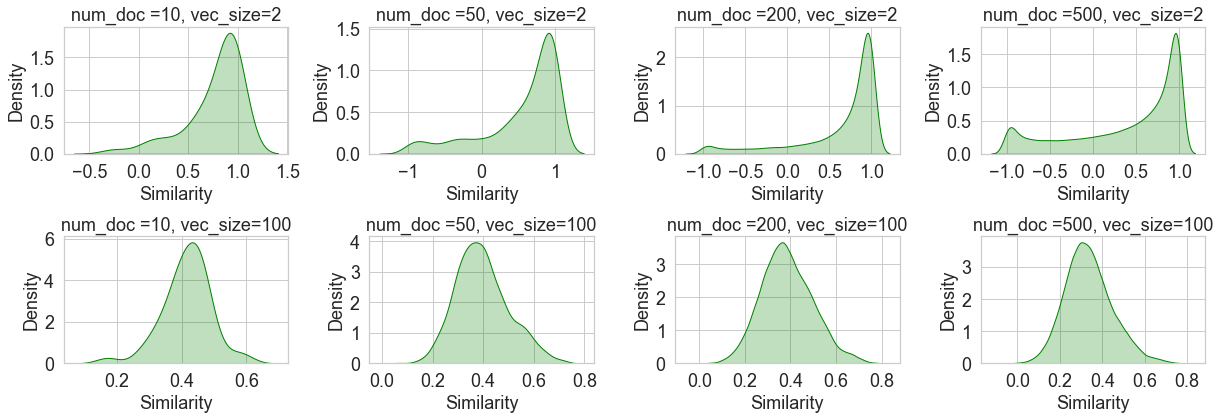

In [11]:
plt.figure(figsize=(17, 6))

# Plot similarity graphs
for i, vector_size in enumerate(vector_sizes):
    for j, num_documents in enumerate(num_documents_values):
        
        document_length = 1
        experimental = prep_data_functions.ExperimentalDF(num_documents=num_documents, document_length=document_length)
        corpus = experimental.create_experiment_wo_dupl()
        words = np.array(corpus)[:, 0]

        word_embeddings = embeddings_functions.FastTextEmbeddings(corpus)
        
        embeddings = word_embeddings.train_and_get_emb(words=words,
                                                        window=1,
                                                        min_count=1,
                                                        workers=1,
                                                        seed=1,
                                                        sg=1,
                                                        vector_size=vector_size,
                                                        norm=True)

        similarity = embeddings_functions.Similarity2(embeddings_df=embeddings)
        df_cosine = similarity.get_cosine_similarity_of_all_words()
        print(f"Experiment: num_doc ={num_documents}, vector_size={vector_size} - train is done")
        
        subplot_idx = (i * len(num_documents_values)) + j + 1
        ax = plt.subplot(len(vector_sizes), len(num_documents_values), subplot_idx)
        sns.kdeplot(df_cosine["similarity"], color="green", label="Cosine Similarity", fill=True)
        plt.xlabel("Similarity")
        plt.ylabel("Density")
        plt.title(f"num_doc ={num_documents}, vec_size={vector_size}")
        
        # Increase font size for all text in the plot
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                     ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(18)  # You can adjust the font size as needed

plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.savefig('fasttext_density.pdf', bbox_inches='tight', pad_inches=0.1)

plt.tight_layout()
plt.show()


Experiment: num_documents=10, vector_size=2 - train is done
Experiment: num_documents=50, vector_size=2 - train is done
Experiment: num_documents=200, vector_size=2 - train is done
Experiment: num_documents=500, vector_size=2 - train is done
Experiment: num_documents=10, vector_size=100 - train is done
Experiment: num_documents=50, vector_size=100 - train is done
Experiment: num_documents=200, vector_size=100 - train is done
Experiment: num_documents=500, vector_size=100 - train is done


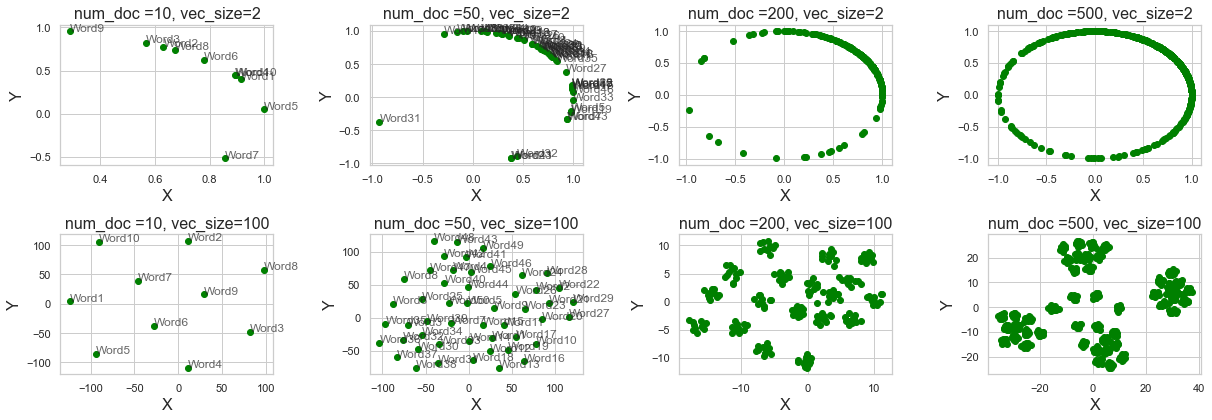

In [12]:
plt.figure(figsize=(17, 6))

for j, vector_size in enumerate(vector_sizes):
    
    for i, num_documents in enumerate(num_documents_values):
       
        document_length = 1
        experimental = prep_data_functions.ExperimentalDF(num_documents=num_documents, document_length=document_length)
        corpus = experimental.create_experiment_wo_dupl()
        words = np.array(corpus)[:, 0]

        word_embeddings = embeddings_functions.FastTextEmbeddings(corpus)
        
        embeddings = word_embeddings.train_and_get_emb(words=words,
                                                        window=1,
                                                        min_count=1,
                                                        workers=1,
                                                        seed=1,
                                                        sg=1,
                                                        vector_size=vector_size,
                                                        norm=True)

        print(f"Experiment: num_documents={num_documents}, vector_size={vector_size} - train is done")
        ax = plt.subplot(len(vector_sizes), len(num_documents_values), j * len(num_documents_values) + i + 1)  # Note the swap in dimensions
        embedding_array = embeddings.values
        num_dimensions = embedding_array.shape[1]

        if num_dimensions == 2:
            x = embedding_array[:, 0]
            y = embedding_array[:, 1]
            plt.scatter(x, y, color = "green")
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Y", fontsize=16)
            plt.title(f"num_doc ={num_documents}, vec_size={vector_size}", fontsize=16)
            
            if num_documents <=50:
                for k, word in enumerate(embeddings.index):
                    plt.annotate(word, (x[k], y[k]), alpha=0.7, fontsize=12)  # Adjust fontsize as needed
        else:
            tsne_model = TSNE(n_components=2, random_state=42)
            tsne_embeddings = tsne_model.fit_transform(embedding_array)
            x = tsne_embeddings[:, 0]
            y = tsne_embeddings[:, 1]
            plt.scatter(x, y, color = "green")
            plt.xlabel("X", fontsize=16)
            plt.ylabel("Y", fontsize=16)
            plt.title(f"num_doc ={num_documents}, vec_size={vector_size}", fontsize=16)
            
            if num_documents <=50:
                for k, word in enumerate(embeddings.index):
                    plt.annotate(word, (x[k], y[k]), alpha=0.7, fontsize=12)  # Adjust fontsize as needed

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.savefig('fasttext_plot.pdf', bbox_inches='tight')

plt.tight_layout()
plt.show()